# **Group Assignment 2: Human-machine Interaction and Greater Zero-sum Gains [100 points]**

Due: May 8th by 1:59 pm (not at midnight)

# Instructions
In this assignment you will work in groups of 4 students max (they can be the same as the previous group assignment). You will be presented with an additional challenge: achieving complementary team performance. You will be designing an experiment to validate your solutions and hypotheses of what you think you are going to observe. Through a small-scale user study, you will collect some evidence to gain insights about your solution.  

**Deliverables:**
1.   A PDF containing all of your responses to the written questions shared in this notebook.

Upload the PDF in 1 to the main assignment link on Gradescope.

Only one submission per group is needed. Add the names of your team members:

    [List names here]

**Learning outcomes:**
1.  Formulating study designs to test your solutions.
2.  Executing the study and interpreting the data acquired.

In [61]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from sklearn.metrics import *

TRUE_LABELS = np.array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0])
GROUP_MAP = {
    1: 'Correct AI',
    2: 'Random AI',
    3: 'Control (No AI)'
}

### Background
Make sure you read and undestand these concepts before you start developing the assignment.

People team up with AI-powered systems to accomplish critical
tasks as well as more mundane tasks. There is a premise stating that the expertise of the AI system complements the expertise of the human, which allows the partnership to accomplish even more than each actor involved alone. This is reflected in a better human-AI team performance or **complementary performance** because the interacting parties' aggregate gains and losses can be more than zero, i.e., there's a non-zero-sum situation.

In practice, the degree of complementary expertise can vary from no overlap of expertise to perfect complementarity. Besides, it is not always easy for a human user to know when an AI system may be an expert in some parts of
a task but be a non-expert in others.

Despite observed improvements when humans collaborate with AI in certain tasks compared to humans working alone, there remains a gap with respect to the AI's performance in autonomous operation. The challenges mentioned above can potentially contribute to achieving such superior performance than both individual parts. Importantly, we would like to keep the human-in-the-loop for acceptance, accountability, and ethical and legal considerations.  


### Your goal: Design an AI assistance solution that will allow the human-AI team to achieve better task-related performace than each part operating separately.

Reference: [You Complete Me: Human-AI Teams and Complementary
Expertise](https://dl.acm.org/doi/10.1145/3491102.3517791)

### Part 1 — Study overview

### Problem 1.1 [6 points]
Define an AI-based solution with explanations and specify the target end users.
This problem should allow or **have the potential for greater zero-sum gains**. A task that is very easy for humans might not be suitable (it will be hard to beat the human alone).
Because we are not following the initial stages of design thinking to identify real needs and define your solution again in this assignment, you can use any of the ideas from previous assignments.

Make sure to include
*   The need being fulfilled by your solution  
*   What the model inputs, general mechanism, and outputs are
*   How explainability or interpretability is incorporated

Our objective: In order to address the need for assistive tools for annotating the factual consistency of text, we propose an human + AI-based solution that combines human judgment with recommendations from a factual consistency checker. Our solution aims to improve the efficiency and accuracy of annotating text, and allows for humans to override incorrect recommendations from factual consistency checkers based on their discretion.

Need: Annotated data is used to train summarization and QA systems, but to ensure that annotated text is factually consistent, we have devised this system in order to allow for larger amounts of data to be labelled in a faster and more efficient manner. By providing recommendations from a factual consistency checker, we aim to streamline the annotation process and improve the quality of annotations.

Inputs, Mechanism, and Outputs:

Inputs: The input to the model is i) the original text and ii) its corresponding summary. The summary is what annotators are meant to analyze and detect factual consistencies in.

General mechanism: The fact-consistency checker is meant to identify potential inconsistencies in the text. We assume that this model can also provide specific phrases/spans of text that it detects inconsistencies in. This factual consistency checker compares the content of the text with the reference summary to detect discrepancies. The model then generates recommendations and highlights parts of the text that are inconsistent or consistent (different colors correspond to different parts of the highlighted text).

Outputs: The outputs of the model include the recommendations for annotating the text, such as highlighting inconsistent parts in red and relevant parts in green. The highlighted segments of the text are meant to indicate areas where inconsistencies or relevant information that is factually consistent and follows from the original text have been detected. These outputs are displayed on an interface where human annotators can review the recommendations and make annotations based on their judgment.

Explainability: We use visualization as a form of explanation. By using these visual aids to illustrate the reasoning behind the model's recommendations, we can help annotators be more efficient and make faster decisions. We use color-coded highlights to indicate different types of information (inconsistencies, relevant facts) which in turn makes it easier for human annotators to understand the basis of the recommendations.
We could also incorporate a sort of feedback loop that allows the model to learn from human corrections and improve its accuracy over time.

Although our work specifically looks to augment and help annotators make more efficient decisions, the potential target end users for this solution include fact-checkers, researchers, journalists, legal teams, etc who would need to put in their reports or research through rigorous fact-checking processes.
However, our original goal is to use AI recommendations in tandem with human judgment to improve the efficiency and accuracy of annotating text for factual consistency, which would allow for the development of better fact-checking applications to benefit the aforementioned types of users who make use of these applications.

Additional room for improving this solution also includes generating explanations i.e we could use a model to generate explanations for why certain parts of the text are flagged as inconsistent or relevant.

### Problem 1.2 [8 points]

Formulate the hypotheses you need to test in a user study that allow you to validate whether your solution achieves the main goal (complementary team performance).
This requires specifying what you will be measuring (dependent variables) and the independent variables (experimental treatments or manipulations).


**Note:** balance the complexity and feasibility of running such a study. Think about what are the necessary conditions that would allow you to validate your solution.

List down your hypotheses here and a short rationale for each one:

*   Hypothesis 1: Participants who are shown the article and summary along with correct AI highlighting will outperform participants not shown any highlighting in the summary correctness test
    - We hypothesize that correct highlighting will help readers better evaluate the article when they do not have the domain knowledge to better understand the passage.  
*   H2: Participants who are shown the article and summary along with the correct AI highlighting will outperform participants not shown any highlighting in terms of time taken to evaluate the summary correctness
    - We hypothesize that highlighting key segments of the text will allow readers to be able to better understand the text and evaluate the correctness of the summary. They can read the key points of the passage rather than trying to decipher cryptic text. However, participants provided with incorrect highlighting may take more time due to conflicting information. 
*	H3: Participants will not show automation bias when given the AI highlighting of the passage.
    - We hypothesize that the conflicting information between the incorrect AI highlighting and the summary given will allow the participants to doubt the validity of the highlighting and to analyze the passage in more detail to determine the validity of the summary. 

...

*Define your independent variables here*

* Type of passage highlighting (correct, incorrect, no highlighting)

*Define your dependent variables here. You don't need to specify how you will measure them here.*

* Performance: Participant accuracy of determining summary validity 
* Speed: Time taken to assess all passages and summaries

### Problem 1.3 [6 points]

Define your experimental task and how you will acquire the data to compute the dependent variables mentioned above.

*One or two sentences for your task definition*

*For each dependent variable, explain how these will be computed*
*   Dependent variable 1: 
    *   Speed: We will measure the time elapsed for users to assess all passages and their summaries. The specific time for each passage will also be recorded. 
*   Dependent variable 2: 
    * Performance: We will measure the performance by recording the binary answers (yes/no) of participants on whether the summaries are valid for a given passage. As a metric, the f1-score will be calculated from the binary answers and the correct response. 
...


### Part 2 — Interface development

### Problem 2.1 [40 points]
Build your **React prototype** with the intent to gather meaningful feedback for evaluating your solution's effectiveness. We won't be asking you to build paper or Figma prototypes this time, but some planning of the interface and interactions is recommended.

Take into account that

*   Your interface should support the recording of all the measurements relevant to validate your hypotheses.
*   You may need additional pages to capture some metrics (e.g., through questionnaires).
*   Data recording is a must here since you will recruit participants to validate your hypotheses.
* You don't need to host your web application. You can launch the web interface locally for the main study in the next stage.   


The actual deliverable for this part will be a demo for the pitch session scheduled during the final exam slot of this course. More information about the format will be released soon.

As you complete this assignment, please prepare the demo.

*Provide a link to your code here. It can be a github repository or Google Drive folder*

[Link to code](https://github.com/nexync/iml_final/tree/master)

### Bonus [10%]:

Implement the actual ML model that generates the outcomes of interest and connect it with your main interface. In this way, rather than mocking up the AI outcomes or behaviors, you can use your model to display the predictions and the corresponding explanations when needed.

Considerations:
* You may need access to certain datasets and annotations to train the model(s).

* Think about what information you need to access in the backend to be transferred to the frontend, where the user will have the interaction with your AI system.

* Real time processing is not required, but if your model relies on users' inputs to make some computations, then you may have to consider online processing.

If you decide to complete the bonus, please report the dataset, data splits, training setup, experiments, and model evaluation.

### Part 3 — Conducting a user study

### Problem 3.1 [5 points]

Before running your user study, we need to define the:

1.  Experimental protocol of your study (execution steps)
2.  Recruitment strategy (target population, inclusion/exclusion criteria, and participants' assignment).

As a guide, your responses should resemble the corresponding sections in the Methods sections of the papers we have discussed in class.

*One paragraph with your experimental protocol*

*One paragraph with the participants information*

### Problem 3.2 [35 points]
Collect data with at least 8 subjects. For this assignment, it is acceptable if the participants you recruit are not those specified as the target end users (explain if this is the case).

Note: normally, we would need IRB approvals for conducting human-subjects evaluation, even when the risks are low because this type of studies involve intervention or testing (Neuropsychological/ cognitive/ psychosocial/ behavioral/ educational).

Do the statistical analyses and report your main findings. Did you find evidence for your hypotheses? briefly discuss your results.



*One paragraph describing the statistical analysis plan*

*Provide a brief description of the sample of participants*


*Organize your results by sections considering the depedent variables or constructs measured*

#### Participant performance
*Your results here. Include descriptive statistics and outcomes of the statistical tests. Graphs or visualizations can be included as well.*

In [44]:
import pandas as pd 

results_csv = pd.read_csv('results.csv')
results_csv

,question,answer,time,subject,group
0,1,0,72.0,1,1
1,2,1,29.0,1,1
2,3,1,48.0,1,1
3,4,0,48.0,1,1
4,5,0,46.0,1,1


##### F1 scores

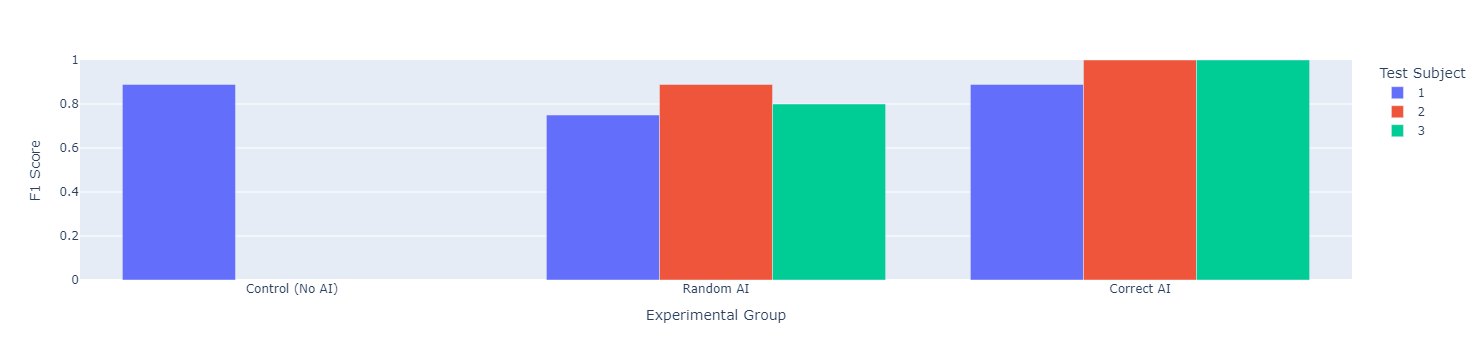

In [96]:
plot_dict = {k: [] for k in ('Experimental Group', 'Test Subject', 'F1 Score')}
for group in reversed(sorted(df['group'].unique())):
    group_df = df[df['group'] == group]
    for subject in group_df['subject'].unique():
        subject_df = group_df[group_df['subject'] == subject]
        subject_acc = f1_score(TRUE_LABELS, subject_df['answer'])
        plot_dict['Experimental Group'].append(GROUP_MAP[group])
        plot_dict['Test Subject'].append(str(subject))
        plot_dict['F1 Score'].append(subject_acc)
plot_df = pd.DataFrame(plot_dict)
fig = px.bar(
    plot_df,
    x='Experimental Group',
    y='F1 Score',
    color='Test Subject',
    barmode='group',
    range_y=[0,1]
)
fig.show()

##### T-tests

In [76]:
group1 = plot_df.loc[plot_df['Experimental Group'] == 'Correct AI', 'F1 Score']
group2 = plot_df.loc[plot_df['Experimental Group'] == 'Random AI', 'F1 Score']
group3 = plot_df.loc[plot_df['Experimental Group'] == 'Control (No AI)', 'F1 Score']

In [82]:
t_stat, p_value = stats.ttest_ind(group1, group3)

print('T-test statistics:', t_stat)
print('P-value:', p_value)

T-test statistics: 0.9999999999999994
P-value: 0.4226497308103745


In [83]:
t_stat, p_value = stats.ttest_ind(group2, group3)

print('T-test statistics:', t_stat)
print('P-value:', p_value)

T-test statistics: -0.9347195428044834
P-value: 0.44860787177003214


#### Participant speed
*Your results here*

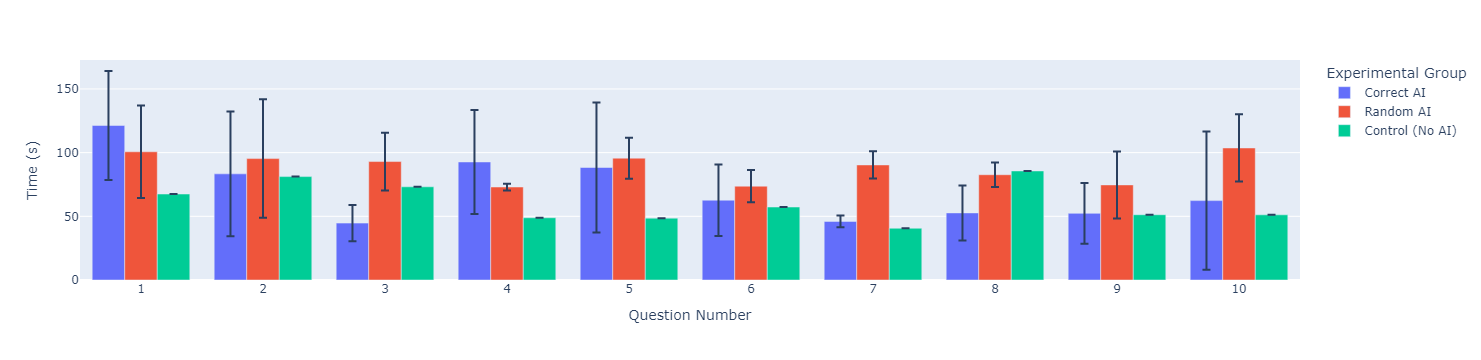

In [102]:
plot_df = df.drop(['answer', 'subject'], axis=1).groupby(['question', 'group'])
plot_df = pd.merge(plot_df.mean().rename({'time': 'Time (s)'}, axis=1), plot_df.std().rename({'time': 'std_time'}, axis=1), how='left', on=['question', 'group'])
plot_df = plot_df.reset_index()
plot_df['Experimental Group'] = plot_df['group'].apply(lambda x: GROUP_MAP[x])
plot_df['Question Number'] = plot_df['question'].apply(lambda x: str(x))
fig = px.bar(
    plot_df,
    x='Question Number',
    y='Time (s)',
    color='Experimental Group',
    barmode='group',
    error_y='std_time'
)
fig.show()

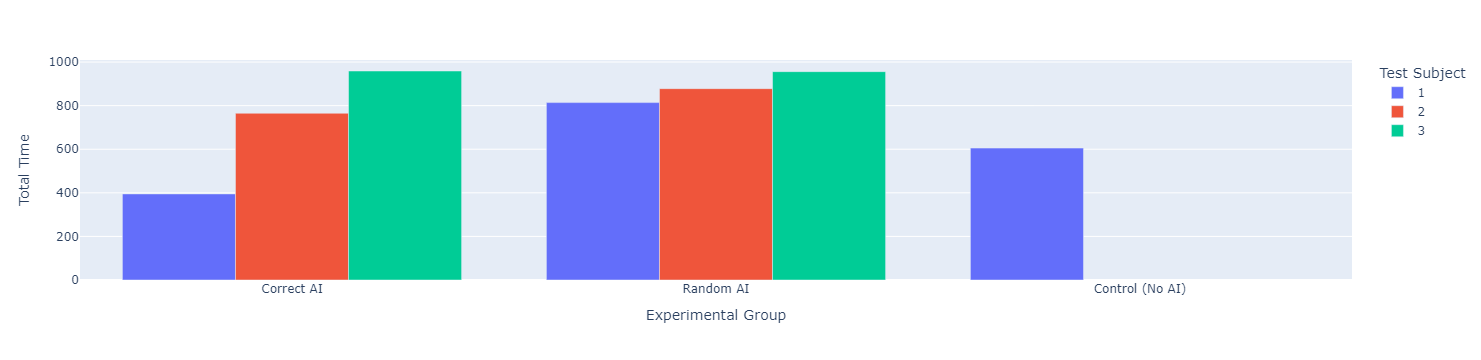

In [105]:
groupby_df = results_csv.groupby(['group', 'subject'])['time'].sum().reset_index(name='total_time')
groupby_df.columns = ['Experimental Group', 'Test Subject', 'Total Time']
groupby_df = groupby_df.replace({'Experimental Group': GROUP_MAP})
groupby_df['Test Subject'] = groupby_df['Test Subject'].astype(str)

fig = px.bar(
    groupby_df,
    x='Experimental Group',
    y='Total Time',
    color='Test Subject',
    barmode='group',
)
fig.show()

##### T-tests

In [107]:
group1 = groupby_df.loc[groupby_df['Experimental Group'] == 'Correct AI', 'Total Time']
group2 = groupby_df.loc[groupby_df['Experimental Group'] == 'Random AI', 'Total Time']
group3 = groupby_df.loc[groupby_df['Experimental Group'] == 'Control (No AI)', 'Total Time']

In [108]:
t_stat, p_value = stats.ttest_ind(group1, group3)

print('T-test statistics:', t_stat)
print('P-value:', p_value)

T-test statistics: 0.3053280061168335
P-value: 0.7889629704664276


In [112]:
t_stat, p_value = stats.ttest_ind(group2, group3)

print('T-test statistics:', t_stat)
print('P-value:', p_value)

T-test statistics: 3.377601830055834
P-value: 0.07759147782237402


*One or two paragraphs with the analysis of the results and contrast against your hypotheses*
